Bank Customer Churn

Account information for 10,000 customers at a European bank, including details on their credit score, balance, products, and whether they have churned.

What attributes are more common among churners than non-churners? Can churn be predicted using the variables in the data?

What do the overall demographics of the bank's customers look like?

Is there a difference between German, French, and Spanish customers in terms of account behavior?

What types of segments exist within the bank's customers?


In [6]:
!pip install pygwalker

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.5 MB ? eta -:--:--
     ------- -------------------------------- 0.8/4.5 MB 2.1 MB/s eta 0:00:02
     ----------- ---------------------------- 1.3/4.5 MB 2.1 MB/s eta 0:00:02
     ----------------------- ---------------- 2.6/4.5 MB 3.3 MB/s eta 0:00:01
     ----------------------------------- ---- 3.9/4.5 MB 4.1 MB/s eta 0:00:01
     ---------------------------------------- 4.5/4.5 MB 4.1 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl (27 kB)
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ----------- ---------------------------- 3.1/11.0 MB 15.4 MB/s eta 0:00:01
     -------------

  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
import pandas as pd

import pygwalker as pyg
import numpy as np


In [3]:
# import zipfile

# with zipfile.ZipFile("data\Bank+Customer+Churn.zip", mode="r") as archive:
#     for file in archive.namelist():
#         archive.extractall("data/Bank_Customer_Churn/")

In [2]:
df = pd.read_csv("data\Bank_Customer_Churn\Bank_Churn.csv")

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


C:\Users\serge\AppData\Local\Temp\ipykernel_21968\3365265801.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axis)


array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

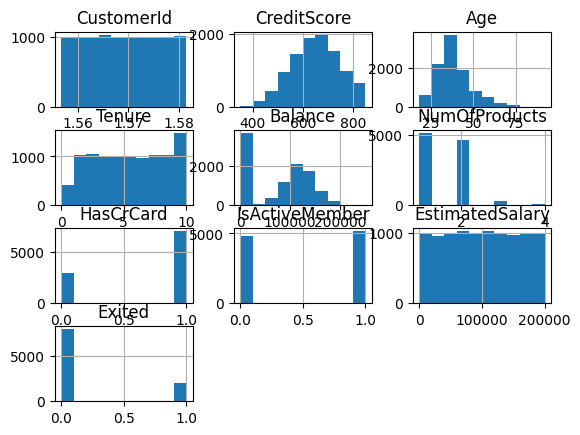

In [3]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

df.hist(ax=axis)

In [7]:
!pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     - -------------------------------------- 0.5/11.1 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/11.1 MB 2.6 MB/s eta 0:00:04
     ------- -------------------------------- 2.1/11.1 MB 3.9 MB/s eta 0:00:03
     ------------- -------------------------- 3.7/11.1 MB 4.5 MB/s eta 0:00:02
     ------------------------ --------------- 6.8/11.1 MB 7.0 MB/s eta 0:00:01
     ---------------------------------------  11.0/11.1 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------- 11.1/11.1 MB 9.3 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3

In [11]:
df[["Geography", "Gender"]]

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [17]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np


pipe = Pipeline(steps=[("oe", OrdinalEncoder(dtype=np.int8))])
transformed_X = pipe.fit_transform(df[["Geography", "Gender"]])

print(transformed_X)


[[0 0]
 [2 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [18]:
df2 = pd.DataFrame(transformed_X, columns=["Geography", "Gender"])

df[["Geography", "Gender"]] = df2

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:
corr = df.corr(numeric_only=True)

corr

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


In [22]:
!pip install -U numpy seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
      --------------------------------------- 0.3/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.9 MB 1.2 MB/s eta 0:00:11
     -- ------------------------------------- 0.8/12.9 MB 1.2 MB/s eta 0:00:10
     --- ------------------------------------ 1.0/12.9 MB 1.2 MB/s eta 0:00:10
     ---- ----------------------------------- 1.3/12.9 MB 1.3 MB/s eta 0:00:10
     ----- ---------------------------------- 1.8/12.9 MB 1.4 MB/s eta 0:00:09
     ------ --------------------------------- 2.1/12.9 MB 1.4 MB/s eta 0:00:08
     ------- -------------------------------- 2.4/12.9 MB 1.3 MB/s eta 0:00:08
     ------- -------------------------------- 2.4/12.9 MB 1.3 MB/s eta 0:00:08
     -------- ------------------------------- 2.6/12.9 MB 1.3 MB/s eta 0:00:09
     -------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygwalker 0.4.9.13 requires numpy<2.0.0, but you have numpy 2.2.2 which is incompatible.


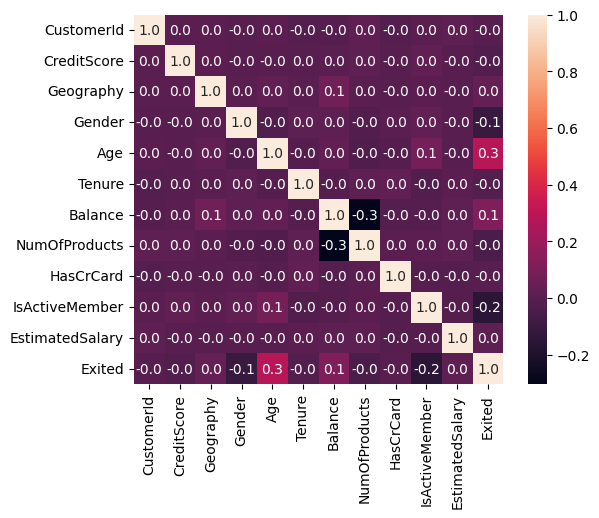

In [20]:
import seaborn as sns


# mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with "sns.heatmap()"
sns.heatmap(corr, ax=ax, square=True, annot=True, fmt=".1f")


plt.show(fig)

In [5]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001B34DFB58A0>: Failed to resolve 'api.segment.io' ([Errno 11001] getaddrinfo failed)"))


In [4]:
walker = pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062c5e2ea07f4eXFKm3TrOVvxdL5ty" style="height: auto">\n    <hea…

In [21]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [25]:
# df.drop("Surname", axis=1, inplace=True)

df.set_index("CustomerId", inplace=True)

In [26]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1


In [27]:
X = df.copy()
y = X.pop("Exited")

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X, y)

rfc

RandomForestClassifier()

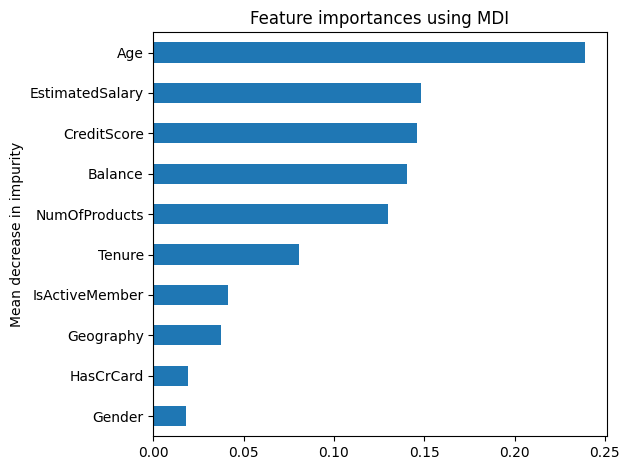

In [31]:
import matplotlib.pyplot as plt

importances = rfc.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

